In [116]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import preprocessing
from sklearn import metrics
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import classification_report
from time import perf_counter

Decision Tree Classifer

In [117]:
df = pd.read_csv('Data for repository.csv')

In [118]:
df

,Movie Name,Release Period,Whether Remake,Whether Franchise,Genre,New Actor,New Director,New Music Director,Lead Star,Director,Music Director,Number of Screens,Revenue(INR),Budget(INR)
0,Golden Boys,Normal,No,No,suspense,Yes,No,No,Jeet Goswami,Ravi Varma,Baba Jagirdar,5,5000000,85000
1,Kaccha Limboo,Holiday,No,No,drama,Yes,No,Yes,Karan Bhanushali,Sagar Ballary,Amardeep Nijjer,75,15000000,825000
2,Not A Love Story,Holiday,No,No,thriller,No,No,No,Mahie Gill,Ram Gopal Verma,Sandeep Chowta,525,75000000,56700000
3,Qaidi Band,Holiday,No,No,drama,Yes,No,No,Aadar Jain,Habib Faisal,Amit Trivedi,800,210000000,4500000
4,Chaatwali,Holiday,No,No,adult,Yes,Yes,Yes,Aadil Khan,Aadil Khan,Babloo Ustad,1,1000000,1075000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,Fight Club,Holiday,No,No,action,No,Yes,No,Zayed Khan,Vikram Chopra,Pritam,375,82500000,88862500
1694,Strings Of Paasion,Normal,No,No,drama,No,Yes,Yes,Zeenat Aman,Sanghamitra Chaudhuri,Dev Sikdar,10,8000000,70000
1695,Dunno Y Na Jaane Kyun,Normal,No,No,drama,No,No,No,Zeenat Aman,Sanjay Sharma,Nikhil,20,12500000,850000
1696,Taj Mahal - An Eternal Love Story,Normal,No,No,drama,No,Yes,No,Zulfi Sayed,Akbar Khan,Naushad,135,100000000,31065000


In [119]:
label_encoder = preprocessing.LabelEncoder()

df['Release Period'] = label_encoder.fit_transform(df['Release Period'])
df['Release Period'].unique()

df['Whether Remake'] = label_encoder.fit_transform(df['Whether Remake'])
df['Whether Remake'].unique()

df['Whether Franchise'] = label_encoder.fit_transform(df['Whether Franchise'])
df['Whether Franchise'].unique()

df['New Actor'] = label_encoder.fit_transform(df['New Actor'])
df['New Actor'].unique()

df['Number of Screens'] = label_encoder.fit_transform(df['Number of Screens'])
df['Number of Screens'].unique()

array([  4,  24,  65,  76,   0,   9,   1,  15,  95,  64,  71,  70, 143,
        99, 134,  68, 115, 135,  13,  14,  57,  19,  60,  31,  84,  58,
        37,  44,  17,  89,  49, 102,  86,  74,  91,  63,  82,  97,   7,
        56,   5,  46,  41,  66,  23,  94,  87,  92,  34,  90,  20,  53,
        29,  27, 123,  85, 104, 101, 121, 109, 130,  61, 117,  88, 103,
        81,  80, 105, 114, 133, 129, 126,  62,  69,  21,  78, 100, 120,
       119, 108, 131, 125, 110,  77,  96, 113,  67,  93, 106,  98,  72,
        75,  42,  11,  59,  18,  25,  22,  26,  51,  79,  38,  47,  16,
        10,   3, 112,  54,  83,   2,   6,  50,  48,  45, 118, 116, 128,
        36,  39,  12,  40, 127, 124,  30,   8,  32, 140,  73, 107,  35,
        43, 122, 111,  28, 144, 146, 141, 145, 137, 136, 142, 138, 132,
        52,  55, 139,  33], dtype=int64)

In [120]:
feature_cols = ['Release Period', 'Whether Remake', 'Whether Franchise', 'New Actor', 'Number of Screens']
X = df[feature_cols]
y = []
for i in range(len(X)):
    if df['Revenue(INR)'][i] - df['Budget(INR)'][i] > 0:
        y.append(1)
    else:
        y.append(0)

In [121]:
t_1 = perf_counter()

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [123]:
clf = DecisionTreeClassifier(random_state=42, max_depth=7)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [124]:
t_2 = perf_counter()

In [125]:
print(f"Time taken for the training the Decision Tree Model:\n\n", t_2 - t_1)
print(f"Classification Report(Decision Tree):\n\n", classification_report(y_test, y_pred))

Time taken for the training the Decision Tree Model:

 0.20805360000122164
Classification Report(Decision Tree):

               precision    recall  f1-score   support

           0       0.68      0.60      0.64       156
           1       0.83      0.88      0.85       354

    accuracy                           0.79       510
   macro avg       0.76      0.74      0.75       510
weighted avg       0.79      0.79      0.79       510



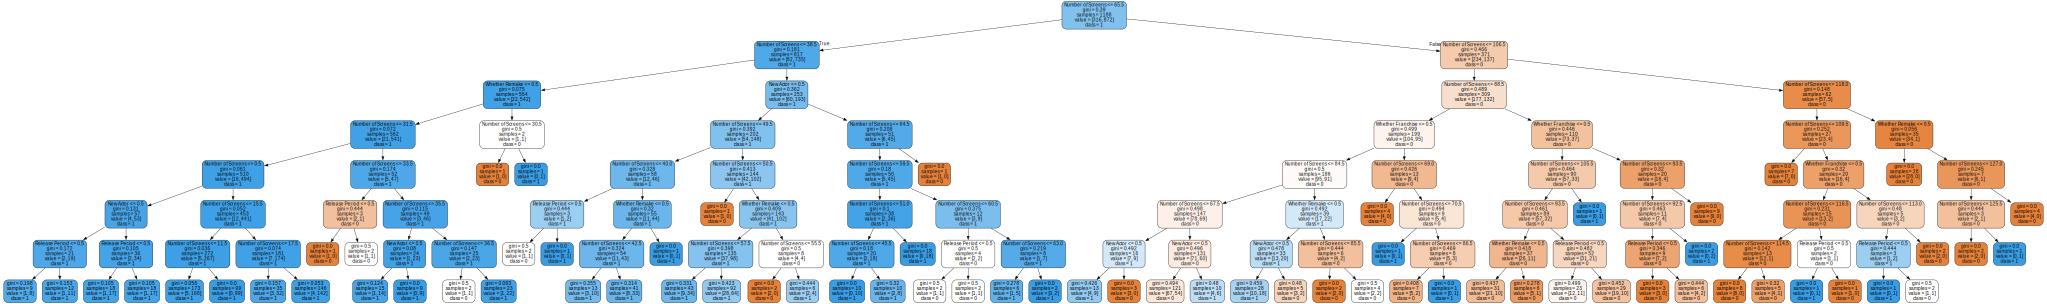

In [126]:
d = export_graphviz(clf, out_file = None, feature_names=feature_cols, class_names=['0','1'] , rounded=True, filled=True)

graphviz.Source(d)

Naive Bayes Classifier

In [127]:
t_1 = perf_counter()

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [129]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [130]:
t_2 = perf_counter()

In [131]:
print(f"Time taken for the training the Decision Tree Model:\n\n", t_2 - t_1)
print(f"Classification Report(Naive Bayes Classifer):\n\n", classification_report(y_test, y_pred))

Time taken for the training the Decision Tree Model:

 0.20179340000140655
Classification Report(Naive Bayes Classifer):

               precision    recall  f1-score   support

           0       0.74      0.40      0.52       156
           1       0.78      0.94      0.85       354

    accuracy                           0.77       510
   macro avg       0.76      0.67      0.68       510
weighted avg       0.77      0.77      0.75       510

